In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:

x0=0
y0 = 0
V0 = 0.5
theta0 = -np.pi/2

xf=5
yf = 5
Vf = 0.5
thetaf = -np.pi/2

T = 15.0
Dt = 0.01
eps = 1e-8

In [45]:
# A and b
A = np.array([
    [1, 0, 0,   0,   0, 0, 0,   0],
    [0, 1, 0,   0,   0, 0, 0,   0],
    [0, 0, 0,   0,   1, 0, 0,   0],
    [0, 0, 0,   0,   0, 1, 0,   0],
    [1,   T,   T*T,   T**3,   0, 0, 0,   0],
    [0, 1, 2*T, 3*T*T, 0, 0, 0,   0],
    [0, 0, 0,   0,   1,   T,   T*T,   T**3],
    [0, 0, 0,   0,   0, 1, 2*T, 3*T*T]
], dtype=float)


B = np.array([
    0,
    0,
   0,
  -.5,
    5,
    0,
    5,
   -.5
], dtype=float)


X = np.linalg.pinv(A) @ B
a1i = X[0:4].copy()
a2i  =X[4:8].copy()



In [46]:
t = np.arange(0, T+Dt/2, Dt)
N = len(t)

xd  = np.zeros(N)
yd  = np.zeros(N)
xd1 = np.zeros(N)
yd1 = np.zeros(N)
xd2 = np.zeros(N)
yd2 = np.zeros(N)

for i in range(N):
    ti = t[i]
    a0, a1, a2, a3 = a1i
    xd[i]  = a0 + a1*ti + a2*(ti*ti) + a3*(ti*ti*ti)
    xd1[i] = a1 + 2*a2*ti + 3*a3*(ti*ti)
    xd2[i] = 2*a2 + 6*a3*ti

    b0, b1, b2, b3 = a2i      # y polynomial coefficients

    yd[i]  = b0 + b1*ti + b2*(ti*ti) + b3*(ti*ti*ti)
    yd1[i] = b1 + 2*b2*ti + 3*b3*(ti*ti)
    yd2[i] = 2*b2 + 6*b3*ti

# diserd theta dot and v dot
thetad = np.arctan2(yd1, xd1)
Vd = np.sqrt(xd1**2 + yd1**2)

In [47]:
#find a and w
a = np.zeros(N)
w = np.zeros(N)

for i in range(N):
    c = np.cos(thetad[i])
    s = np.sin(thetad[i])

    a[i] = xd2[i]*c + yd2[i]*s

    d = Vd[i]
    if abs(d) < eps:
        d = eps

    w[i] = (-s*xd2[i] + c*yd2[i]) / d

In [48]:
# eulare method

x = np.zeros(N)
y = np.zeros(N)
V = np.zeros(N)
theta = np.zeros(N)

x[0]=x0
y[0]=y0

V[0]=V0
theta[0] =theta0

for i in range(N-1):
    x[i+1]     = x[i]     + Dt * V[i] * np.cos(theta[i])
    y[i+1]     = y[i]     + Dt * V[i] * np.sin(theta[i])
    V[i+1]     = V[i]     + Dt * a[i] + np.random.normal(0, 0.01)
    theta[i+1] = theta[i] + Dt * w[i] + np.random.normal(0, 0.001)


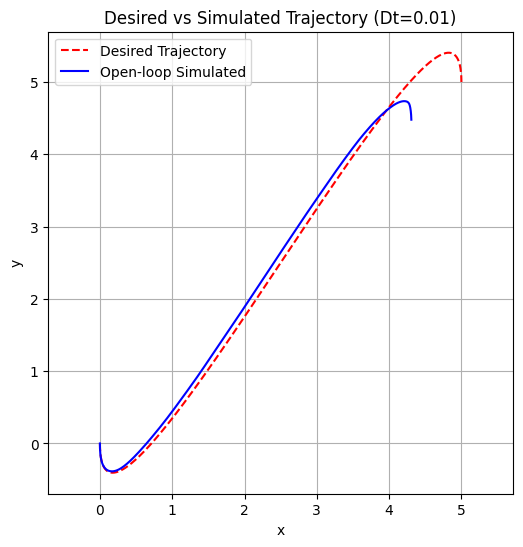

In [49]:
#plt

plt.figure(figsize=(6,6))
plt.plot(xd, yd, 'r--', label='Desired Trajectory')
plt.plot(x, y, 'b', label='Open-loop Simulated')
plt.title('Desired vs Simulated Trajectory (Dt=0.01)')
plt.xlabel('x'); plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.legend()
